# Preliminary Data Analysis
The following jupyter notebook aims to perform some preliminary data analysis for our STEM (Science, Technology, Engineering, Math) dataset which can be found [Here](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries) . We will perform the following tasks:
* **Missing Values**
    * Test for missing values 
    * Understand where missing values occur
    * Understand the impact of missing values
* **Data Distribution**
    * How many companies?
    * Most represented companies
    * Distribution of people across America
    * Gender ratios
    * Ethnicity ratios
    * Understand the average salary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/Levels_Fyi_Salary_Data.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


## Missing Values

In [3]:
#Let's find the portion of data with missing values with respect to each column

for col in df.columns:
    tot_missing = (df[df[col].isna() == True].shape)[0]
    tot = (df.shape)[0]
    print(f'Column: \"{col}\" | Total Missing: {tot_missing} | Missing: {(tot_missing/tot)*100:.2f}%')

Column: "timestamp" | Total Missing: 0 | Missing: 0.00%
Column: "company" | Total Missing: 5 | Missing: 0.01%
Column: "level" | Total Missing: 119 | Missing: 0.19%
Column: "title" | Total Missing: 0 | Missing: 0.00%
Column: "totalyearlycompensation" | Total Missing: 0 | Missing: 0.00%
Column: "location" | Total Missing: 0 | Missing: 0.00%
Column: "yearsofexperience" | Total Missing: 0 | Missing: 0.00%
Column: "yearsatcompany" | Total Missing: 0 | Missing: 0.00%
Column: "tag" | Total Missing: 854 | Missing: 1.36%
Column: "basesalary" | Total Missing: 0 | Missing: 0.00%
Column: "stockgrantvalue" | Total Missing: 0 | Missing: 0.00%
Column: "bonus" | Total Missing: 0 | Missing: 0.00%
Column: "gender" | Total Missing: 19540 | Missing: 31.19%
Column: "otherdetails" | Total Missing: 22505 | Missing: 35.93%
Column: "cityid" | Total Missing: 0 | Missing: 0.00%
Column: "dmaid" | Total Missing: 2 | Missing: 0.00%
Column: "rowNumber" | Total Missing: 0 | Missing: 0.00%
Column: "Masters_Degree" | T

Analysis of missing values in the data reveal that overall, information on general aspects of a subject's job such as salary, experience, company, level, etc, are consistently made available, whilst highly personal subject information which is considered sensitive, is often kept private. Features with significant missing values include:

* Race - **64.2% Missing**
* Education - **51.5% Missing**
* Gender - **31.2% Missing**

The feature 'otherdetails' is missing 35.9% of the time. Let's investigate the significance of this feature further:

In [4]:
#Let's display some values in the 'otherdetails' column
np.unique(list(df['otherdetails'].values))

array(['"Near Boston" was considered a middle pay grade at Mozilla (Remote), Race: White, Academic Level: Some college coursework completed',
       '"Stock grant" amount reflects how much I\'ll vest this year, Race: Asian, Academic Level: Master’s degree',
       '"bonus" is on call pay - Masters', ...,
       '“Staff Solutions Consultant”',
       '€3k signing bonus, 1500 stocks grant, Title: Backend Engineer, Academic Level: Bachelor’s degree',
       '€4k Relocation bonus, Race: Asian, Academic Level: Master’s degree'],
      dtype='<U762')

It appears relevant information is being displayed in the 'otherdetails' column. We should investigate if Race information for users can be found in 'otherdetails' that can't be found in 'race'.

In [5]:
#Let's investigate the 'type' of values found in each column
for col in df.columns:
    print(f'Column: "{col}" | Type: {type(df[col][0])}')

Column: "timestamp" | Type: <class 'str'>
Column: "company" | Type: <class 'str'>
Column: "level" | Type: <class 'str'>
Column: "title" | Type: <class 'str'>
Column: "totalyearlycompensation" | Type: <class 'numpy.int64'>
Column: "location" | Type: <class 'str'>
Column: "yearsofexperience" | Type: <class 'numpy.float64'>
Column: "yearsatcompany" | Type: <class 'numpy.float64'>
Column: "tag" | Type: <class 'float'>
Column: "basesalary" | Type: <class 'numpy.float64'>
Column: "stockgrantvalue" | Type: <class 'numpy.float64'>
Column: "bonus" | Type: <class 'numpy.float64'>
Column: "gender" | Type: <class 'float'>
Column: "otherdetails" | Type: <class 'float'>
Column: "cityid" | Type: <class 'numpy.int64'>
Column: "dmaid" | Type: <class 'numpy.float64'>
Column: "rowNumber" | Type: <class 'numpy.int64'>
Column: "Masters_Degree" | Type: <class 'numpy.int64'>
Column: "Bachelors_Degree" | Type: <class 'numpy.int64'>
Column: "Doctorate_Degree" | Type: <class 'numpy.int64'>
Column: "Highschool" 

It's strange that our 4 columns missing the most values, namely: '*otherdetails*','*gender*', '*race*', and '*education*' are all of type 'float' despite actually being 'string' values.

In [6]:
#Let's see if information that can't be found in other columns can be found in 'otherdetails'
c, d=[], []
for index, row in df.iterrows():
    if 'Race' in str(row.otherdetails):
        if row.Race is np.nan:
            c.append(row)
    if 'Academic Level' in str(row.otherdetails):
        if row.Education is np.nan:
            d.append(row)

In [7]:
#let's look at Race information retained in 'otherdetails' not found in 'Race'
print(c[0].otherdetails)
print()
tot_race = (df['Race'].dropna()).shape[0]
print(f'Number of rows with NaN in \'Race\' but race info in \'otherdetails\': {len(c)}')
print(f'Portion accounted for: {(len(d)/tot_race)*100:.2f}%')

Race: American Indian or Alaska Native, Academic Level: Bachelor’s degree

Number of rows with NaN in 'Race' but race info in 'otherdetails': 102
Portion accounted for: 1.13%


In [8]:
#let's look at education information retained in 'otherdetails' not found in 'Education'
print(d[200].otherdetails)
print()
tot_ed = (df['Education'].dropna()).shape[0]
print(f'Number of rows with NaN in \'Education\' but education info in \'otherdetails\': {len(d)}')
print(f'Portion accounted for: {(len(d)/tot_ed)*100:.2f}%')

Title: Program Manager I, Race: White, Academic Level: Technical or occupational certificate

Number of rows with NaN in 'Education' but education info in 'otherdetails': 254
Portion accounted for: 0.84%


### Findings

We can see that the portion of missing information in 'education' and 'race' that can be accounted for in 'otherdetails' is less than **2%**. The information is displayed in an unstructured manner, meaning extraction would take considerable effort involving complex string matching functions.

There is a **considerable** amount of information missing for subjects regarding 'education', 'gender', and 'race'. Through investigation, we conclude that this is an intrinsic property of the data, and is not caused by error. Cases where 'education', and 'race' information can be found in 'otherdetails' and not in the correct column can be considered edge cases that do not fit into a "regular" category. This can be seen in the example above in which a subject describes their race as 'American Indian or Alaska Native', which is clearly not 'Asian', 'Hispanic', 'Black', or 'White'. As this data was scraped, it is likely that edge cases were not accounted for.

The same can be said for 'academic level'. Subjects describing their academic level as 'Associate Degree' or 'Technical or occupational certificate' do not fall under categories of 'Bachelors Degree', 'Masters Degree', 'PhD', or 'Doctorate'.

---

## Data Distribution

In [9]:
#How many unique companies do we have
num_comp = len(df['company'].unique())
print(f'There are a total of: {num_comp} unique companies') 

#Which company is most prevelant
comps = {}
for comp in  df['company']:
    if comp not in comps:
        comps[comp] = 1
    else:
        comps[comp] = comps[comp] + 1

There are a total of: 1632 unique companies


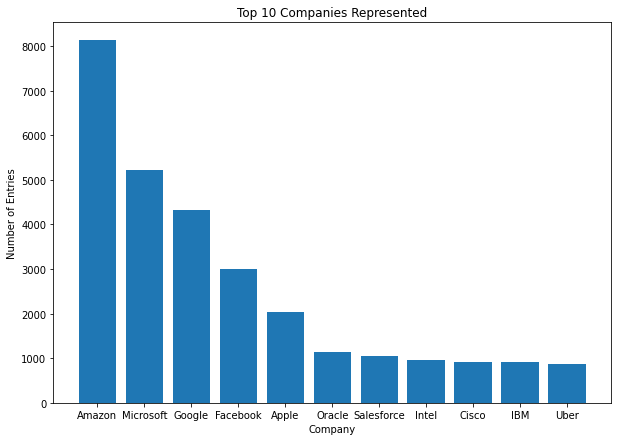

In [10]:
#Top 10 companies represented in this data
sorted_dict = dict(sorted(comps.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10,7))
plt.bar(range(11), list(sorted_dict.values())[:11], align='center')
plt.xticks(range(11), list(sorted_dict.keys())[:11])
plt.title('Top 10 Companies Represented')
plt.xlabel('Company')
plt.ylabel('Number of Entries')
plt.show()

In [11]:
# Let's better understand our distribution of people across states
states = np.array([state.split(',')[-1] for state in (df['location'])])
num_states = len(np.unique(states))
print(f'There are a total of: {num_states} unique states') 

#Which state is most prevelant
state_dict = {}
for state in states:
    if state not in state_dict:
        state_dict[state] = 1
    else:
        state_dict[state] += 1

There are a total of: 129 unique states


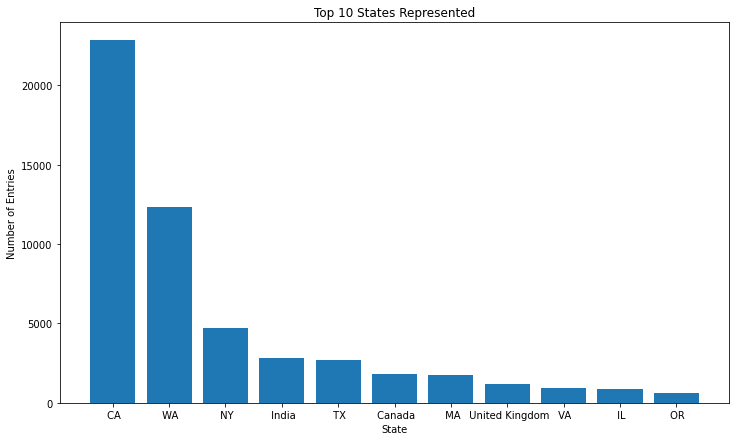

In [12]:
#Top 10 states represented in this data
sorted_dict = dict(sorted(state_dict.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(12,7))
plt.bar(range(11), list(sorted_dict.values())[:11], align='center')
plt.xticks(range(11), list(sorted_dict.keys())[:11])
plt.title('Top 10 States Represented')
plt.xlabel('State')
plt.ylabel('Number of Entries')
plt.show()

In [13]:
#Number of rows containing Ireland
df[df['location'].str.contains('Ireland')].shape

(326, 29)

As expected, the global tech corporations such as Amazon, Microsoft, and Google represent the vaste majority of subjects collected in this data. As well as that, California and Washington represent the majority states represented in this data. 

Unexpectedly, this data holds information of subjetcs working outside of America. This opens a new opportunity to compare salaries between Americans and Europeans with similar job positions. Interestingly, **326 subjects claim to work in Ireland**. 

In [14]:
#Let's see the ethnic makeup of our data

#Which races are over and under represented
races = {}
for race in df['Race'].dropna():
    if race not in races:
        races[race] = 1
    else:
        races[race] = races[race] + 1

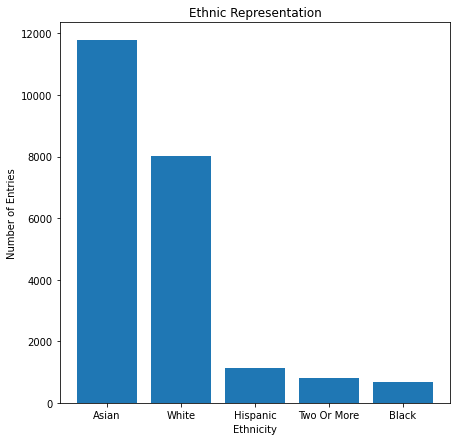

In [15]:
#Ethnicity distribution
sorted_dict = dict(sorted(races.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(7,7))
plt.bar(range(len(sorted_dict)), list(sorted_dict.values()), align='center')
plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.title('Ethnic Representation')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Entries')
plt.show()

In [16]:
#Let's see the gender makeup of our data

genders = {}
for gender in df['gender'].dropna():
    if gender not in genders:
        genders[gender] = 1
    else:
        genders[gender] = genders[gender] + 1

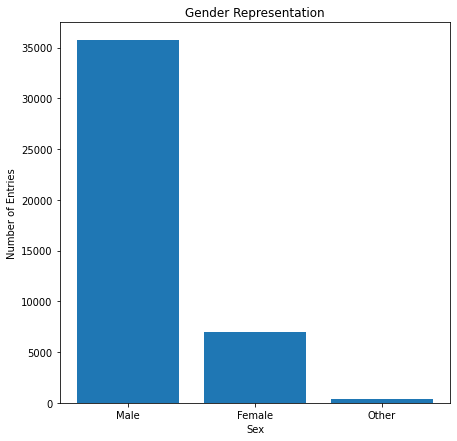

In [17]:
#Ethnicity distribution
sorted_dict = dict(sorted(genders.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(7,7))
plt.bar(range(len(sorted_dict)-1), list(sorted_dict.values())[:-1], align='center')
plt.xticks(range(len(sorted_dict)-1), list(sorted_dict.keys())[:-1])
plt.title('Gender Representation')
plt.xlabel('Sex')
plt.ylabel('Number of Entries')
plt.show()

From these graph we can see that Hispanic and Black subjects are under-represented in this dataset. Asian and White subjects make up the majority of users. In future analysis, these factors should be accounted for. To be precise, inference on base salary with respect to black or hispanic subjects should **not** be considered accurate.

As well as this, females and other sexes are highly under-represented in comparison to males. Again, this should be accounted for.

In [18]:
#Remove salaries equating to 0 and divide them by 1000 for presentability
sal = (df[df['basesalary'] != 0.0]['basesalary']/1000)
sal.describe()

count    60338.000000
mean       141.906670
std         56.296747
min          1.000000
25%        110.000000
50%        141.000000
75%        170.000000
max       1659.870000
Name: basesalary, dtype: float64

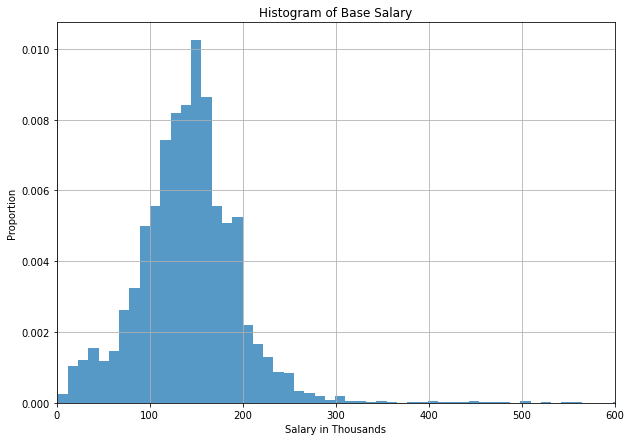

In [19]:
#Now let's finally understand the average Salary
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(sal, 150, density=True, alpha=0.75)

plt.xlabel('Salary in Thousands')
plt.ylabel('Proportion')
plt.title('Histogram of Base Salary')
plt.xlim(0, 600)
plt.grid(True)
plt.show()

### Findings

In our data distribution analysis we found that fristly, the multinational conglomerate tech corporations are highly over represented. This is to be expected because of the sheer volume of employees they have. We also find that California, America's 'Tech Capital' and home to Silicon Valley, is also highly over represented, which again, is expected. It was interesting to find that not only American states are found in this data. Various European countries including Ireland, have multiple entries.

Following from this, we analysed the representation of ethnicities and sex. We find that black and hispanic subjects are poorly represented in this data, whilst asian and white subjects are highly represented. We note that these factors should be accounted for when making any future inference regarding ethnicity. Males are overly represented in comparison to females and other sexes. This is an issue regularly identified in data of this nature. Unfortunately, all of the biases above are intrinsic properties of our dataset.

We conclude our analysis by examining the overall distribution of base salary. The mean salary is 141,000 dollars which is roughly 123,000 Euro. This figure is quite high. Again, this value may be skewed by the over-representation of companies, sexes, and ethnicities. In our case, this figure may not represent exepected salary for under-represented companies, and minorities. The distribution is somewhat right skewed, meaning there are outliers receiving much higher salaries. The highest earner has a base salary of 1,659,000, or 1.6 million dollars.

### Considerations for Future Analysis

* Understand that in this analysis, the type values for columns appear to be inconsistent.
* Understand the high quantity of missing values examined above
* Understand the distribution of data and the under-representation of minorities.
* Be aware that many entries have salary as 0. It is unclear why this is
* Understand that the data includes employees outside of The United States
* As we are planning to use CatBoost, categorical variables are more valuable to us than One-hot encoded vectors. You should consider removing one-hot encoded vectors for simplicity.